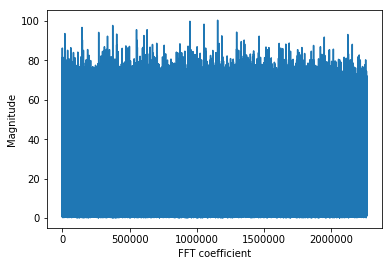

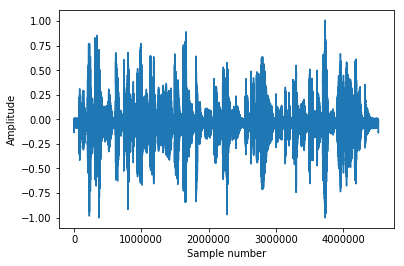

SNR = 20.0


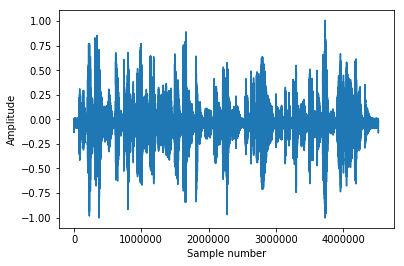

In [8]:
import math   
import numpy as np 
import librosa
import matplotlib.pyplot as plt



'''
Signal to noise ratio (SNR) can be defined as 
SNR = 20*log(RMS_signal/RMS_noise)
where RMS_signal is the RMS value of signal and RMS_noise is that of noise.
      log is the logarithm of 10
*****additive white gausian noise (AWGN)****
 - This kind of noise can be added (arithmatic element-wise addition) to the signal
 - mean value is zero (randomly sampled from a gausian distribution with mean value of zero. standard daviation can varry)
 - contains all the frequency components in an equal manner (hence "white" noise) 
'''

#SNR in dB
#given a signal and desired SNR, this gives the required AWGN what should be added to the signal to get the desired SNR
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

#given a signal, noise (audio) and desired SNR, this gives the noise (scaled version of noise input) that gives the desired SNR
def get_noise_from_sound(signal,noise,SNR):
    RMS_s=math.sqrt(np.mean(signal**2))
    #required RMS of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    
    #current RMS of noise
    RMS_n_current=math.sqrt(np.mean(noise**2))
    noise=noise*(RMS_n/RMS_n_current)
    
    return noise

#***convert complex np array to polar arrays (2 apprays; abs and angle)
def to_polar(complex_ar):
    return np.abs(complex_ar),np.angle(complex_ar)



#**********************************
#*************add AWGN noise******
#**********************************
signal_file=r'C:\Users\yuhaoyu\Desktop\DDSP\saxophone.wav'
signal, sr = librosa.load(signal_file)
signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
noise=get_white_noise(signal,SNR=20)
#analyze the frequency components in the signal
X=np.fft.rfft(noise)
radius,angle=to_polar(X)
plt.plot(radius)
plt.xlabel("FFT coefficient")
plt.ylabel("Magnitude")
plt.show()
signal_noise=signal+noise
plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()

#**********************************
#*************add real world noise******
#**********************************

# signal, sr = librosa.load(signal_file)
# signal=np.interp(signal, (signal.min(), signal.max()), (-1, 1))
# plt.plot(signal)
# plt.xlabel("Sample number")
# plt.ylabel("Signal amplitude")
# plt.show()

# noise_file='/home/sleek_eagle/research/emotion/code/audio_processing/noise.wav'
# noise, sr = librosa.load(noise_file)
# noise=np.interp(noise, (noise.min(), noise.max()), (-1, 1))


#crop noise if its longer than signal
#for this code len(noise) shold be greater than len(signal)
#it will not work otherwise!
if(len(noise)>len(signal)):
    noise=noise[0:len(signal)]

noise=get_noise_from_sound(signal,noise,SNR=20)

signal_noise=signal+noise


print("SNR = " + str(20*np.log10(math.sqrt(np.mean(signal**2))/math.sqrt(np.mean(noise**2)))))

plt.plot(signal_noise)
plt.xlabel("Sample number")
plt.ylabel("Amplitude")
plt.show()





from scipy.io.wavfile import write
write(r"C:\Users\yuhaoyu\Desktop\DDSP\saxophone_withnoiseSNR=20.wav",sr,signal_noise)
